Водопьян А.О. Хабибуллин Р.А. 2019 г. 

# Z - фактор

Импорт необходимых модулей

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sys
sys.path.append('../')
import neftpy.upvt_gas as pvtg
import neftpy.upvt_np_vect as pvtv

# Приведенные давление и температура

Свойства различных углеводородных газов схожи между собой и могут быть обобщены с использованием приведенных давлений и температуры

$$P_{r} = \frac{P}{P_c}$$
$$T_{r} = \frac{T}{T_c}$$
где $p_c$ и $T_c$ критические давление и температура соответственно, которые являются функцией плотности газа и возможного наличия неуглеводородных примесей.

Удельная плотность газов встречающихся на нефтегазовых месторождениях лежит в диапазоне от 0.56 до 1.1

Диапазон температур от 30 до 200 С
Диапазон давлений от 1 до 500 бар


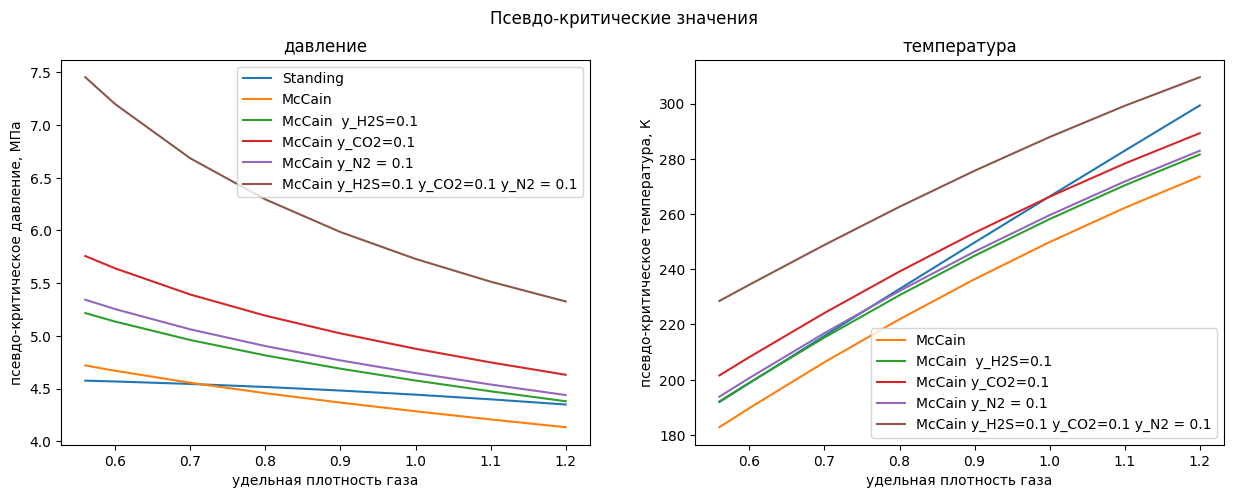

In [59]:
"""
Нарисуем графики псевдо критического давления и температуры от плотности газа

чтобы оценить диапазоны изменения псевдо критических параметров
с учетом наличия примесей
"""
gg_list = [0.56, 0.6, 0.7, 0.8, 0.9, 1, 1.1, 1.2]

p_crit_list = [pvtg.unf_pseudocritical_pressure_Standing_MPa(gg) for gg in gg_list]
t_crit_list = [pvtg.unf_pseudocritical_temperature_Standing_K(gg) for gg in gg_list]

y_h2s:float=[0, 0.1]
y_co2:float=[0, 0.1]
y_n2:float=[0, 0.1]

p_crit_list_impurities={}
t_crit_list_impurities={}
label_impurities={}

p_crit_list_impurities[1] = [pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s[0], y_co2[0], y_n2[0]) for gg in gg_list]
t_crit_list_impurities[1] = [pvtg.unf_pseudocritical_temperature_K(gg, y_h2s[0], y_co2[0], y_n2[0]) for gg in gg_list]
label_impurities[1]='McCain'

p_crit_list_impurities[2] = [pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s[1], y_co2[0], y_n2[0]) for gg in gg_list]
t_crit_list_impurities[2] = [pvtg.unf_pseudocritical_temperature_K(gg,y_h2s[1], y_co2[0], y_n2[0]) for gg in gg_list]
label_impurities[2]='McCain  y_H2S=0.1'

p_crit_list_impurities[3] = [pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s[0], y_co2[1], y_n2[0]) for gg in gg_list]
t_crit_list_impurities[3] = [pvtg.unf_pseudocritical_temperature_K(gg, y_h2s[0], y_co2[1], y_n2[0]) for gg in gg_list]
label_impurities[3]='McCain y_CO2=0.1'

p_crit_list_impurities[4] = [pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s[0], y_co2[0], y_n2[1]) for gg in gg_list]
t_crit_list_impurities[4] = [pvtg.unf_pseudocritical_temperature_K(gg, y_h2s[0], y_co2[0], y_n2[1]) for gg in gg_list]
label_impurities[4]='McCain y_N2 = 0.1'

p_crit_list_impurities[5] = [pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s[1], y_co2[1], y_n2[1]) for gg in gg_list]
t_crit_list_impurities[5] = [pvtg.unf_pseudocritical_temperature_K(gg, y_h2s[1], y_co2[1], y_n2[1]) for gg in gg_list]
label_impurities[5]='McCain y_H2S=0.1 y_CO2=0.1 y_N2 = 0.1'

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Псевдо-критические значения')
ax[0].plot(gg_list, p_crit_list, label = 'Standing' )
for k in p_crit_list_impurities.keys():
    ax[0].plot(gg_list, p_crit_list_impurities[k], label=label_impurities[k] )
ax[0].set(xlabel='удельная плотность газа', ylabel='псевдо-критическое давление, МПа')
ax[0].set_title('давление')
ax[0].legend()
ax[1].plot(gg_list, t_crit_list)
for k in t_crit_list_impurities.keys():
    ax[1].plot(gg_list, t_crit_list_impurities[k], label=label_impurities[k] )
ax[1].set(xlabel='удельная плотность газа', ylabel='псевдо-критическое температура, К')
ax[1].set_title('температура')
ax[1].legend()
plt.show()

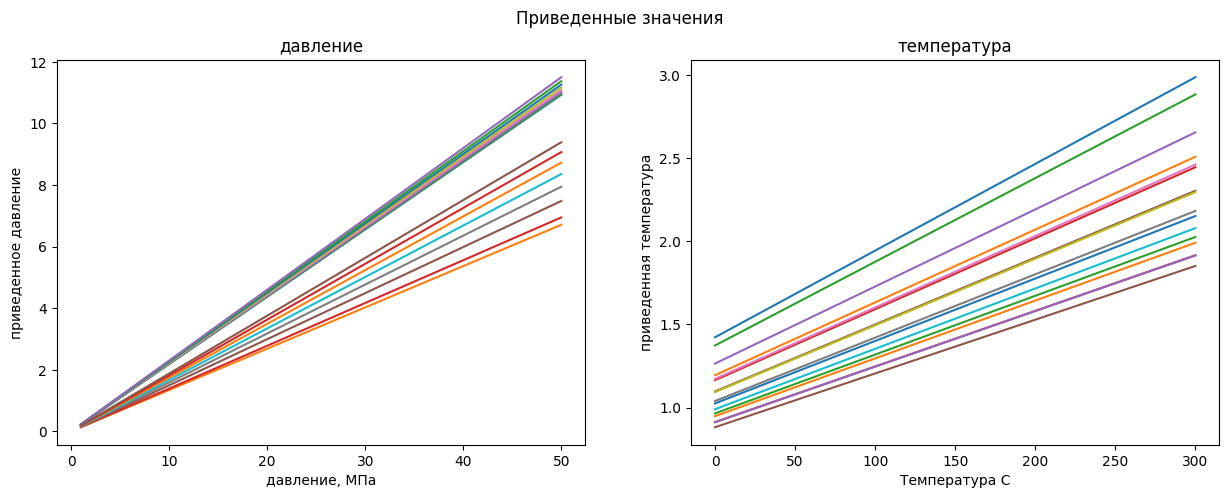

In [60]:
t_list_C = np.linspace(0, 300, 50)
t_list_K = t_list_C + 273
p_list_MPa = np.linspace(1,50, 50)

# нарисуем графики от давления

fig, ax = plt.subplots(1,2, figsize = (15,5))
fig.suptitle('Приведенные значения')
y_h2s:float=0.1
y_co2:float=0.1
y_n2:float=0.1

for gg in gg_list:
    p_crit_Mpa = pvtg.unf_pseudocritical_pressure_Standing_MPa(gg)
    t_crit_K = pvtg.unf_pseudocritical_temperature_Standing_K(gg)

    
    p_crit_list_impurities = pvtg.unf_pseudocritical_pressure_MPa(gg, y_h2s, y_co2, y_n2)
   
    
    ax[0].plot(p_list_MPa, p_list_MPa/p_crit_Mpa)
    ax[0].plot(p_list_MPa, p_list_MPa/p_crit_list_impurities)

ax[0].set(xlabel='давление, МПа', ylabel='приведенное давление')
ax[0].set_title('давление')
#ax[0].legend()

for gg in gg_list:
    p_crit = pvtg.unf_pseudocritical_pressure_Standing_MPa(gg)
    t_crit_K = pvtg.unf_pseudocritical_temperature_Standing_K(gg)
    
    
    t_crit_list_impurities = pvtg.unf_pseudocritical_temperature_K(gg, y_h2s, y_co2, y_n2) 
    ax[1].plot(t_list_K-273, t_list_K/t_crit_K)
    ax[1].plot(t_list_K-273, t_list_K/t_crit_list_impurities)

ax[1].set(xlabel='Температура С', ylabel='приведенная температура')
ax[1].set_title('температура')
#ax[1].legend()
plt.show()

из графиков видо, что имеющие практический интерес значения приведенных давления и температуры лежат в диапазонах 

- давление от 0 до 12
- температура от 0.8 до 3

Источник: Dranchuk P. M. et al. Calculation of Z factors for natural gases using equations of state //Journal of Canadian Petroleum Technology. – 1975. – Т. 14. – №. 03.

Коэффициент сверхсжимаемости учитывает отклонение свойств реального газа от идеального.

Dranchuk P. M. et al. получили уравнение состояния реального газа адаптировав его к экспериментальным данным Stending and Katz

$$Z = 1 + 
(A_1 +\frac{A_2}{T_r} +\frac{A_3}{T_{r}^3} +\frac{A_4}{T_{r}^4} +\frac{A_5}{T_{r}^5})\rho_{r} + 
(A_6 +\frac{A_7}{T_{r}^2} +\frac{A_8}{T_{r}^8})\rho_{r}^2 - 
A_9(\frac{A_7}{T_{r}} +\frac{A_6}{T_{r}^2})\rho_{r}^5 - 
A_{10} (1 + A_{11} \rho_{r}^2) \frac{\rho_{r}^2}{T_{r}^3}exp(-A_{11}\rho_{r}{2})$$
где:
$$\rho_r = \frac{Z_c P_r}{Z T_r}$$
причем:
$$Z_c = 0.27$$
коэффициенты:
$$A_1 =0.3265$$
$$A_2 =-1.0700$$
$$A_3 =-0.5339$$
$$A_4 =0.01569$$
$$A_5 =-0.05165$$
$$A_6 =0.5475$$
$$A_7 =-0.7361$$
$$A_8 =0.1844$$
$$A_{9} =0.1056$$
$$A_{10} =0.6134$$
$$A_{11} =0.7210$$
а приведенные давление и температура:
$$P_{r} = \frac{P}{P_c}$$
$$T_{r} = \frac{T}{T_c}$$
где $p_c$ и $T_c$ критические давление и температура соответственно

Dranchuk and Abou-Kassem[8] found an average absolute error of 0.486% in their equation, with a standard deviation of 0.00747 over ranges of pseudoreduced pressure and temperature of 0.2 < ppr < 30; 1.0 < Tpr < 3.0; and for ppr < 1.0 with 0.7 < Tpr < 1.0.

Dranchuk and Abou-Kassem[8] also found that this equation and other equations of state give unacceptable results near the critical temperature for Tpr = 1.0 and ppr >1.0, so these equations are not recommended in this range.

In [83]:
def get_z_curve_StandingKatz(tpr):
    """
    Функция позволяет считать данные из нужного файла в зависимости от входного tpr и построить график
    Допустимые значения tpr = 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3
    :param tpr: температура приведенная
    :return: данные из графика Cтендинга для этой температуры
    """
    data = pd.read_csv(r'data\Standing-Katz Chart Data\sk_tpr_{}.txt'.format(int(tpr*100)), sep=';')
    ppr = np.array(pd.DataFrame(data)['x'])
    z = np.array(pd.DataFrame(data)['y'])
    return ppr, z

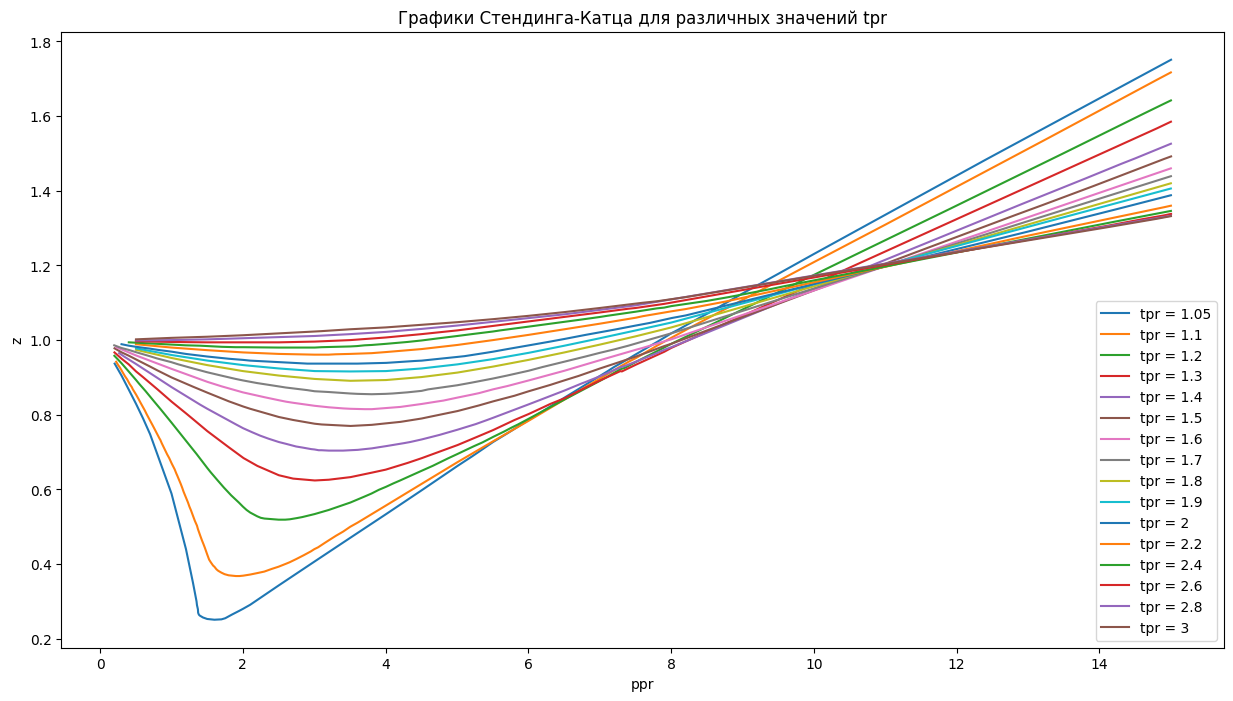

In [85]:
# построим все графики Стендинга сразу
tpr = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3]
plt.figure(figsize=(15,8))

for t in tpr:    
    ppr_standing, z_standing = get_z_curve_StandingKatz(t)
    plt.plot(ppr_standing, z_standing, label='tpr = {}'.format(t))
    this_df_true = pd.DataFrame({f"table SK, tpr = {t}":z_standing}, index = ppr_standing)
    try:
        true_result_df =true_result_df.join(this_df_true, how='outer')
    except:
        true_result_df = this_df_true.copy()
     
plt.title('Графики Стендинга-Катца для различных значений tpr')
plt.legend()
plt.xlabel('ppr')
plt.ylabel('z')
plt.show()

<Axes: >

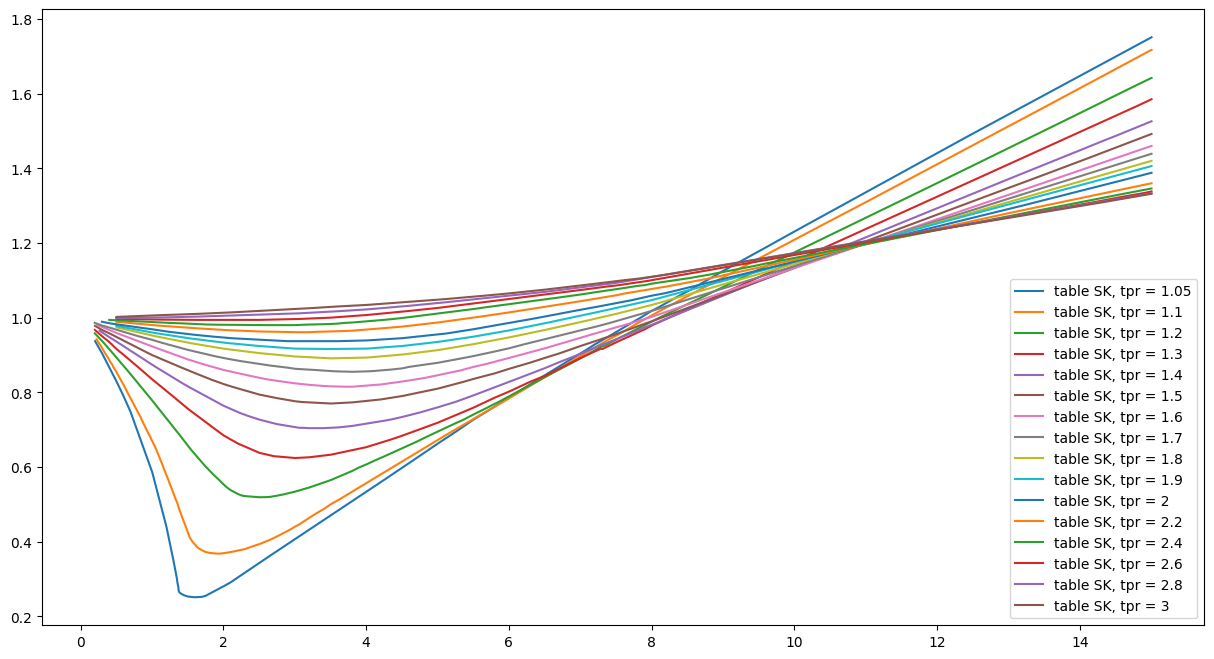

In [86]:
true_result_df.sort_index().interpolate(method='index').plot(figsize=(15,8))

Сравнение экспериментального графика Стендинга-Каци и уравнения Дранчука и Абу-Кассема

<>:8: SyntaxWarning:

invalid escape sequence '\S'

<>:8: SyntaxWarning:

invalid escape sequence '\S'

C:\Users\rnt\AppData\Local\Temp\ipykernel_4440\284630731.py:8: SyntaxWarning:

invalid escape sequence '\S'



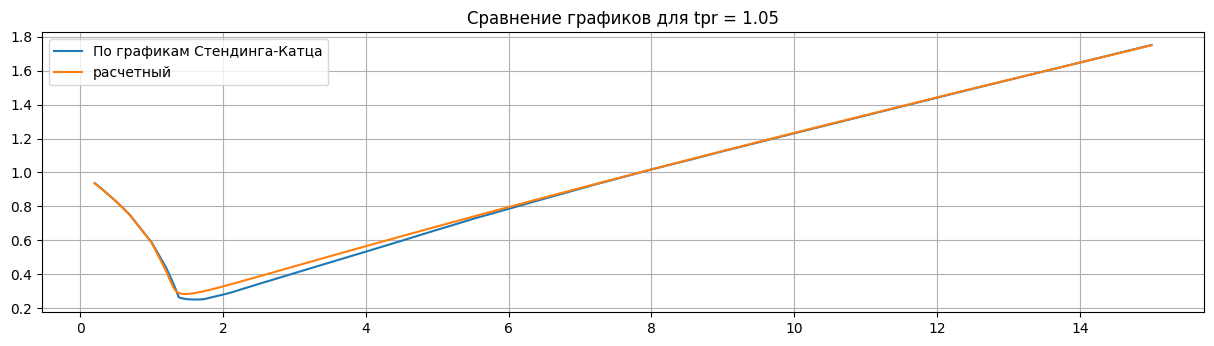

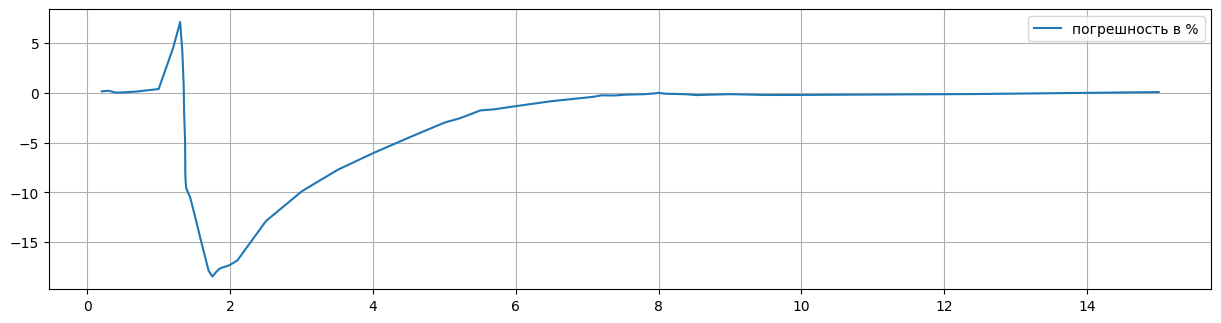

In [4]:
def get_z_curve_StandingKatz(tpr):
    """
    Функция позволяет считать данные из нужного файла в зависимости от входного tpr и построить график
    Допустимые значения tpr = 1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3
    :param tpr: температура приведенная
    :return: данные из графика Cтендинга для этой температуры
    """
    data = pd.read_csv('data\Standing-Katz Chart Data\sk_tpr_{}.txt'.format(int(tpr*100)), sep=';')
    ppr = np.array(pd.DataFrame(data)['x'])
    z = np.array(pd.DataFrame(data)['y'])
    return ppr, z


# Сравним расчетный график с графиком Стендинга
tpr = 1.05
ppr, z = get_z_curve_StandingKatz(tpr)
z_calc = []
pogr = []
i = 0
for p in ppr:
    z_calc.append(PVTcorr.unf_zfactor_DAK_ppr(p, tpr))
    pogr.append((z[i]-z_calc[i])/z[i] * 100)
    i += 1

pylab.figure(figsize=(15,8))
pylab.subplot(211)
pylab.plot(ppr, z, label='По графикам Стендинга-Катца')
pylab.plot(ppr, z_calc, label='расчетный')
pylab.title('Сравнение графиков для tpr = {}'.format(tpr))
pylab.grid()
pylab.legend()
pylab.figure(figsize=(15,8))
pylab.subplot(212)
pylab.plot(ppr, pogr, label='погрешность в %')
pylab.grid()
pylab.legend()
pylab.show()

График Стендинга-Каца

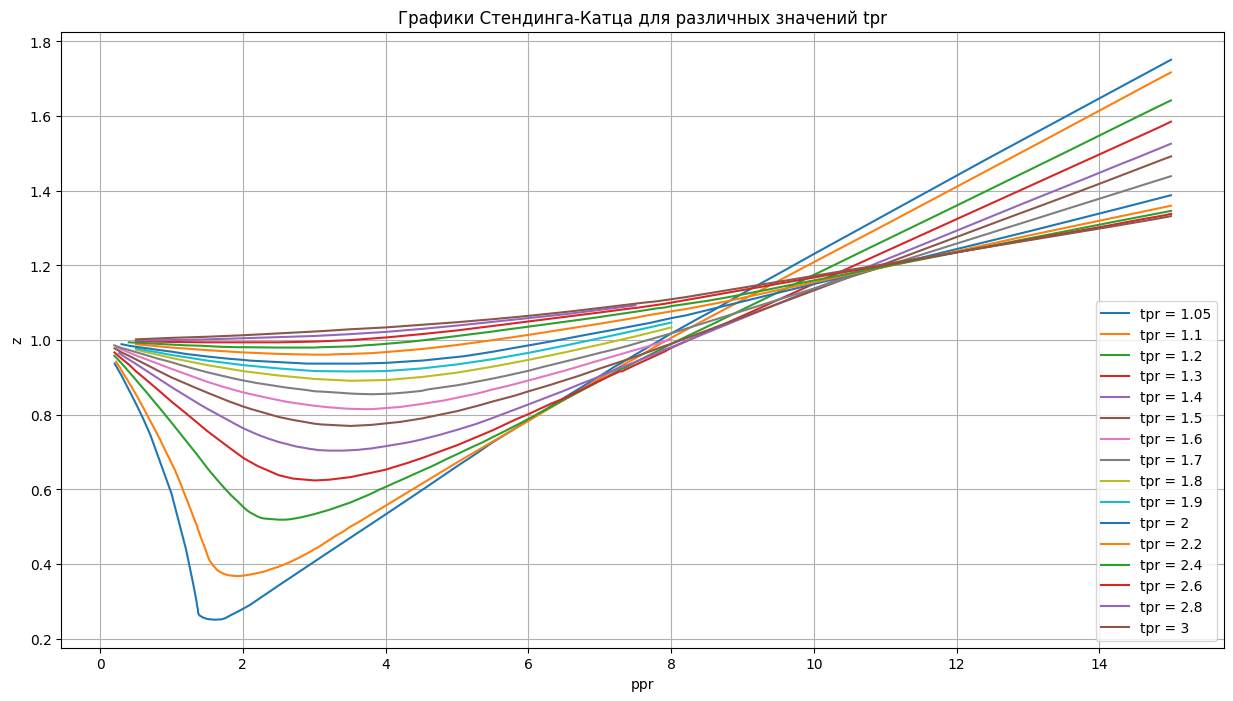

In [5]:
# построим все графики Стендинга сразу
tpr = [1.05, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2, 2.2, 2.4, 2.6, 2.8, 3]
pylab.figure(figsize=(15,8))

for t in tpr:    
    ppr_standing, z_standing = get_z_curve_StandingKatz(t)
    pylab.plot(ppr_standing, z_standing, label='tpr = {}'.format(t))
    this_df_true = pd.DataFrame({f"table SK, tpr = {t}":z_standing}, index = ppr_standing)
    try:
        true_result_df =true_result_df.join(this_df_true, how='outer')
    except:
        true_result_df = this_df_true.copy()
    
    this_calculated_z = []
    this_calculated_z2 = []
    for i in ppr_standing:
        this_calculated_z.append(PVTcorr.unf_zfactor_DAK_ppr(i, t))
        this_calculated_z2.append(PVTcorr.unf_z_factor_Kareem(t,i))
    this_df = pd.DataFrame({f"python DAK tpr = {t}":this_calculated_z}, index = ppr_standing)
    this_df2 = pd.DataFrame({f"python Kareem tpr = {t}":this_calculated_z2}, index = ppr_standing)
    this_df = this_df.join(this_df2, how = 'outer')
    try:
        result_df = result_df.join(this_df, how = 'outer')
    except:
        result_df = this_df.copy()
        
        
pylab.grid()
pylab.title('Графики Стендинга-Катца для различных значений tpr')
pylab.legend()
pylab.xlabel('ppr')
pylab.ylabel('z')
pylab.show()

In [12]:
result_df

python DAK tpr = 1.05  python Kareem tpr = 1.05  python DAK tpr = 1.1  \
0.198                     NaN                       NaN                   NaN   
0.200                     NaN                       NaN                   NaN   
0.201                     NaN                       NaN                   NaN   
0.202                     NaN                       NaN                   NaN   
0.204                0.935466                  0.937468                   NaN   
...                       ...                       ...                   ...   
14.907                    NaN                       NaN                   NaN   
15.000                    NaN                       NaN               1.70767   
15.001                    NaN                       NaN                   NaN   
15.002                    NaN                       NaN                   NaN   
15.003               1.749485                  1.775905                   NaN   

        python Kareem tpr = 1.1  python DAK tpr = 1.2  \
0.198                       NaN                   NaN   
0.200                       NaN              0.959294   
0.201                       NaN                   NaN   
0.202                       NaN                   NaN   
0.204                       NaN                   NaN   
...                         ...                   ...   
14.907                      NaN                   NaN   
15.000                 1.727001                   NaN   
15.001                      NaN              1.635866   
15.002                      NaN                   NaN   
15.003                      NaN                   NaN   

        python Kareem tpr = 1.2  python DAK tpr = 1.3  \
0.198                       NaN                   NaN   
0.200                  0.962037                   NaN   
0.201                       NaN              0.968443   
0.202                       NaN                   NaN   
0.204                       NaN                   NaN   
...                         ...                   ...   
14.907                      NaN                   NaN   
15.000                      NaN                   NaN   
15.001                 1.646379              1.577017   
15.002                      NaN                   NaN   
15.003                      NaN                   NaN   

        python Kareem tpr = 1.3  python DAK tpr = 1.4  \
0.198                       NaN                   NaN   
0.200                       NaN                   NaN   
0.201                  0.971237                   NaN   
0.202                       NaN                   NaN   
0.204                       NaN                   NaN   
...                         ...                   ...   
14.907                      NaN                   NaN   
15.000                      NaN                   NaN   
15.001                 1.580304              1.529271   
15.002                      NaN                   NaN   
15.003                      NaN                   NaN   

        python Kareem tpr = 1.4  ...  python DAK tpr = 2.2  \
0.198                       NaN  ...                   NaN   
0.200                       NaN  ...                   NaN   
0.201                       NaN  ...                   NaN   
0.202                       NaN  ...                   NaN   
0.204                       NaN  ...                   NaN   
...                         ...  ...                   ...   
14.907                      NaN  ...              1.367257   
15.000                      NaN  ...                   NaN   
15.001                 1.528371  ...              1.371501   
15.002                      NaN  ...                   NaN   
15.003                      NaN  ...                   NaN   

        python Kareem tpr = 2.2  python DAK tpr = 2.4  \
0.198                       NaN                   NaN   
0.200                       NaN                   NaN   
0.201                       NaN                   NaN   
0.202  

In [6]:
df_to_compare = result_df.join(true_result_df, how = 'outer')

In [7]:
traces = plotly_workflow.create_traces_list_for_all_columms(df_to_compare, chosen_mode = 'lines+markers')

In [8]:
plotly_workflow.plot_func(traces, 'Коэффициент сверхcжимаемости по Дранчуку и графики Стендинга-Катца', 'checl.html', 
                          iplot_option=True,
                         x_name = 'Псевдоприведенное давление',
                         y_name = 'Коэффициент сверхсжимаемости')